# Question - 01

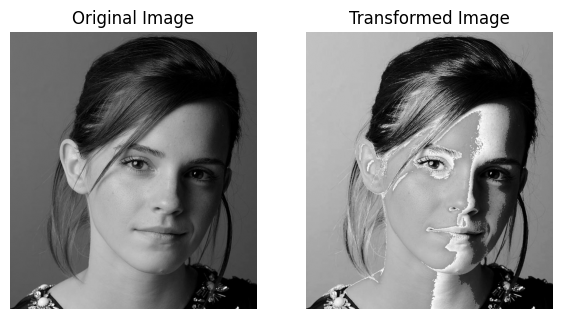

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

# Load the grayscale image
image = io.imread('./a1images/a1images/emma.jpg', as_gray=True)

image_scaled = (image * 255).astype(np.uint8)

def transform_intensity(I_in):
    if I_in < 50:
        return I_in
    elif I_in < 150:
        return 100 + (255-100)/(100) * (I_in-50)
    else:
        return I_in

# Aply the transformation
transformed_image = np.vectorize(transform_intensity)(image_scaled)

# Ensure the output intensities are within [0, 255]
transformed_image = np.clip(transformed_image, 0, 255).astype(np.uint8)

transformed_image_rescaled = transformed_image / 255.0
input_intensities = np.arange(0, 255)

# Apply transformation
output_intensities = np.array([transform_intensity(i) for i in input_intensities])


# Display the original and transformed images
plt.figure(figsize=(7, 7))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(transformed_image_rescaled, cmap='gray')
plt.title('Transformed Image')
plt.axis('off')

plt.show()


# Question - 02

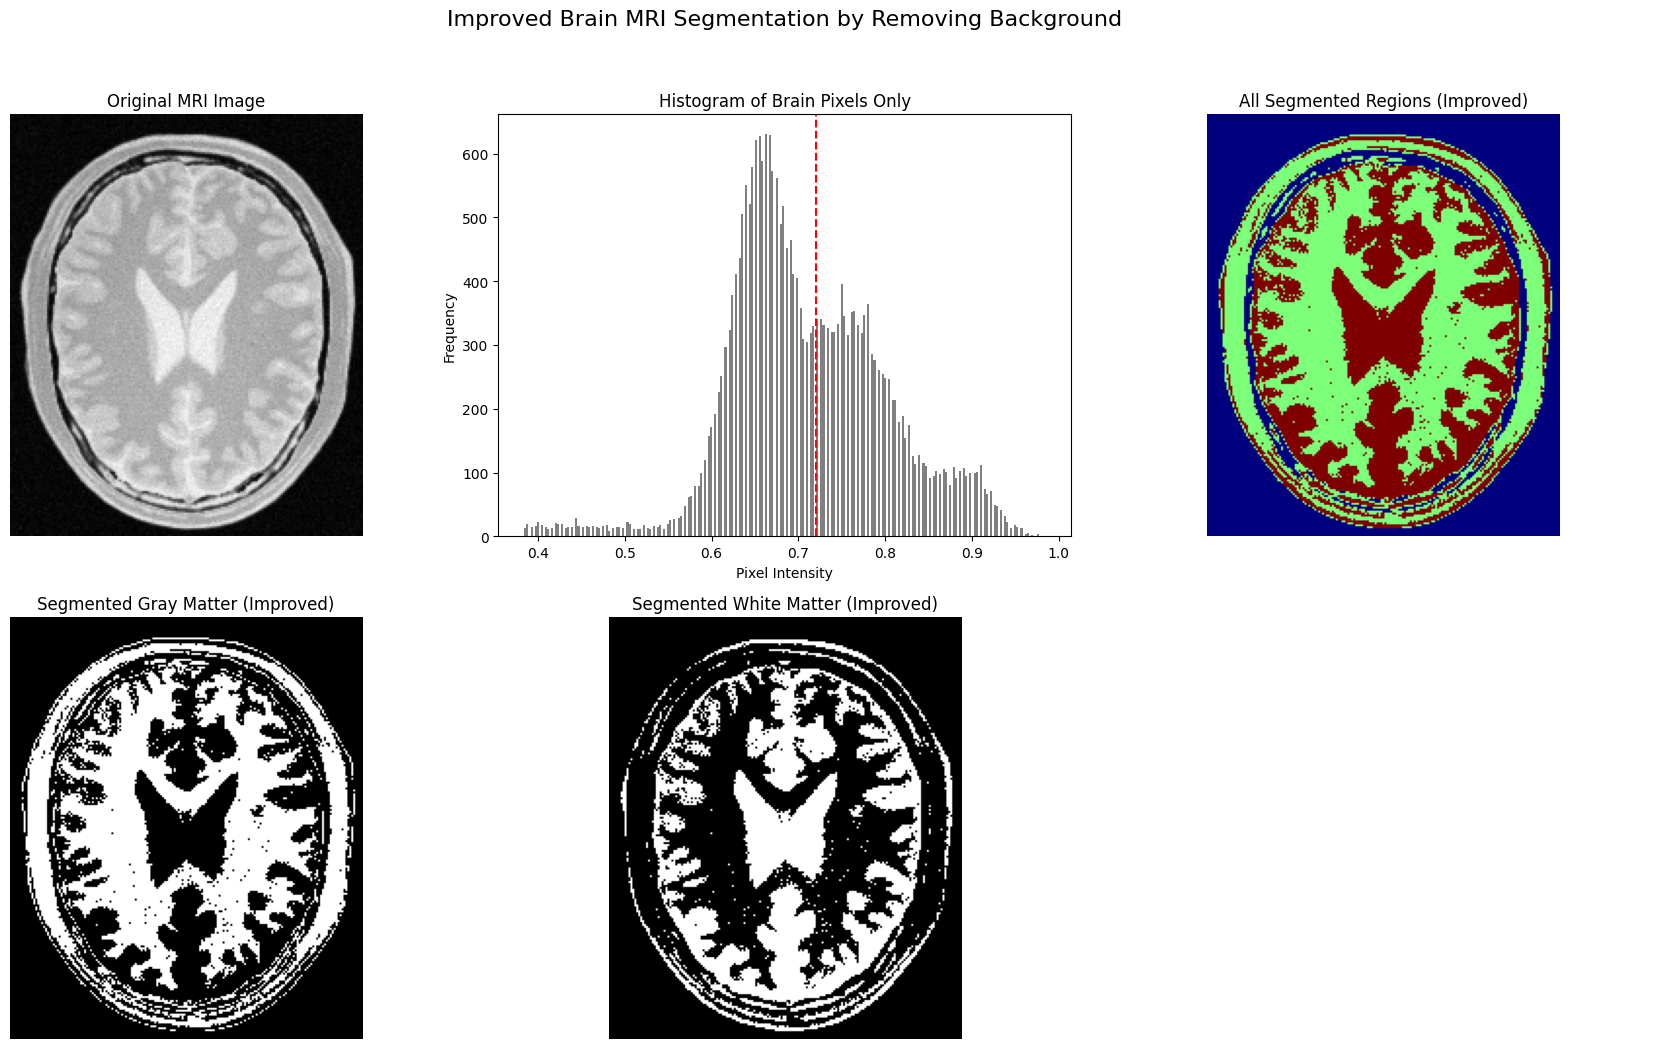

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage.filters import threshold_multiotsu, threshold_otsu


image = io.imread('./a1images/a1images/brain_proton_density_slice.png', as_gray=True)

initial_thresh = threshold_otsu(image)
brain_mask = image > initial_thresh

brain_pixels = image[brain_mask]
brain_thresholds = threshold_multiotsu(brain_pixels, classes=2)

regions = np.digitize(brain_pixels, bins=brain_thresholds) + 1

final_segmentation = np.zeros_like(image, dtype=np.uint8)
final_segmentation[brain_mask] = regions

gray_matter_mask = (final_segmentation == 1)
white_matter_mask = (final_segmentation == 2)

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(18, 11))

ax[0, 0].imshow(image, cmap='gray')
ax[0, 0].set_title('Original MRI Image')
ax[0, 0].axis('off')

ax[0, 1].hist(brain_pixels, bins=255, color='gray')
ax[0, 1].set_title('Histogram of Brain Pixels Only')
for thresh in brain_thresholds:
    ax[0, 1].axvline(thresh, color='r', linestyle='--')
ax[0, 1].set_xlabel('Pixel Intensity')
ax[0, 1].set_ylabel('Frequency')

ax[0, 2].imshow(final_segmentation, cmap='jet')
ax[0, 2].set_title('All Segmented Regions (Improved)')
ax[0, 2].axis('off')

ax[1, 0].imshow(gray_matter_mask, cmap='gray')
ax[1, 0].set_title('Segmented Gray Matter (Improved)')
ax[1, 0].axis('off')

ax[1, 1].imshow(white_matter_mask, cmap='gray')
ax[1, 1].set_title('Segmented White Matter (Improved)')
ax[1, 1].axis('off')

ax[1, 2].axis('off')

plt.suptitle('Improved Brain MRI Segmentation by Removing Background', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Question - 03

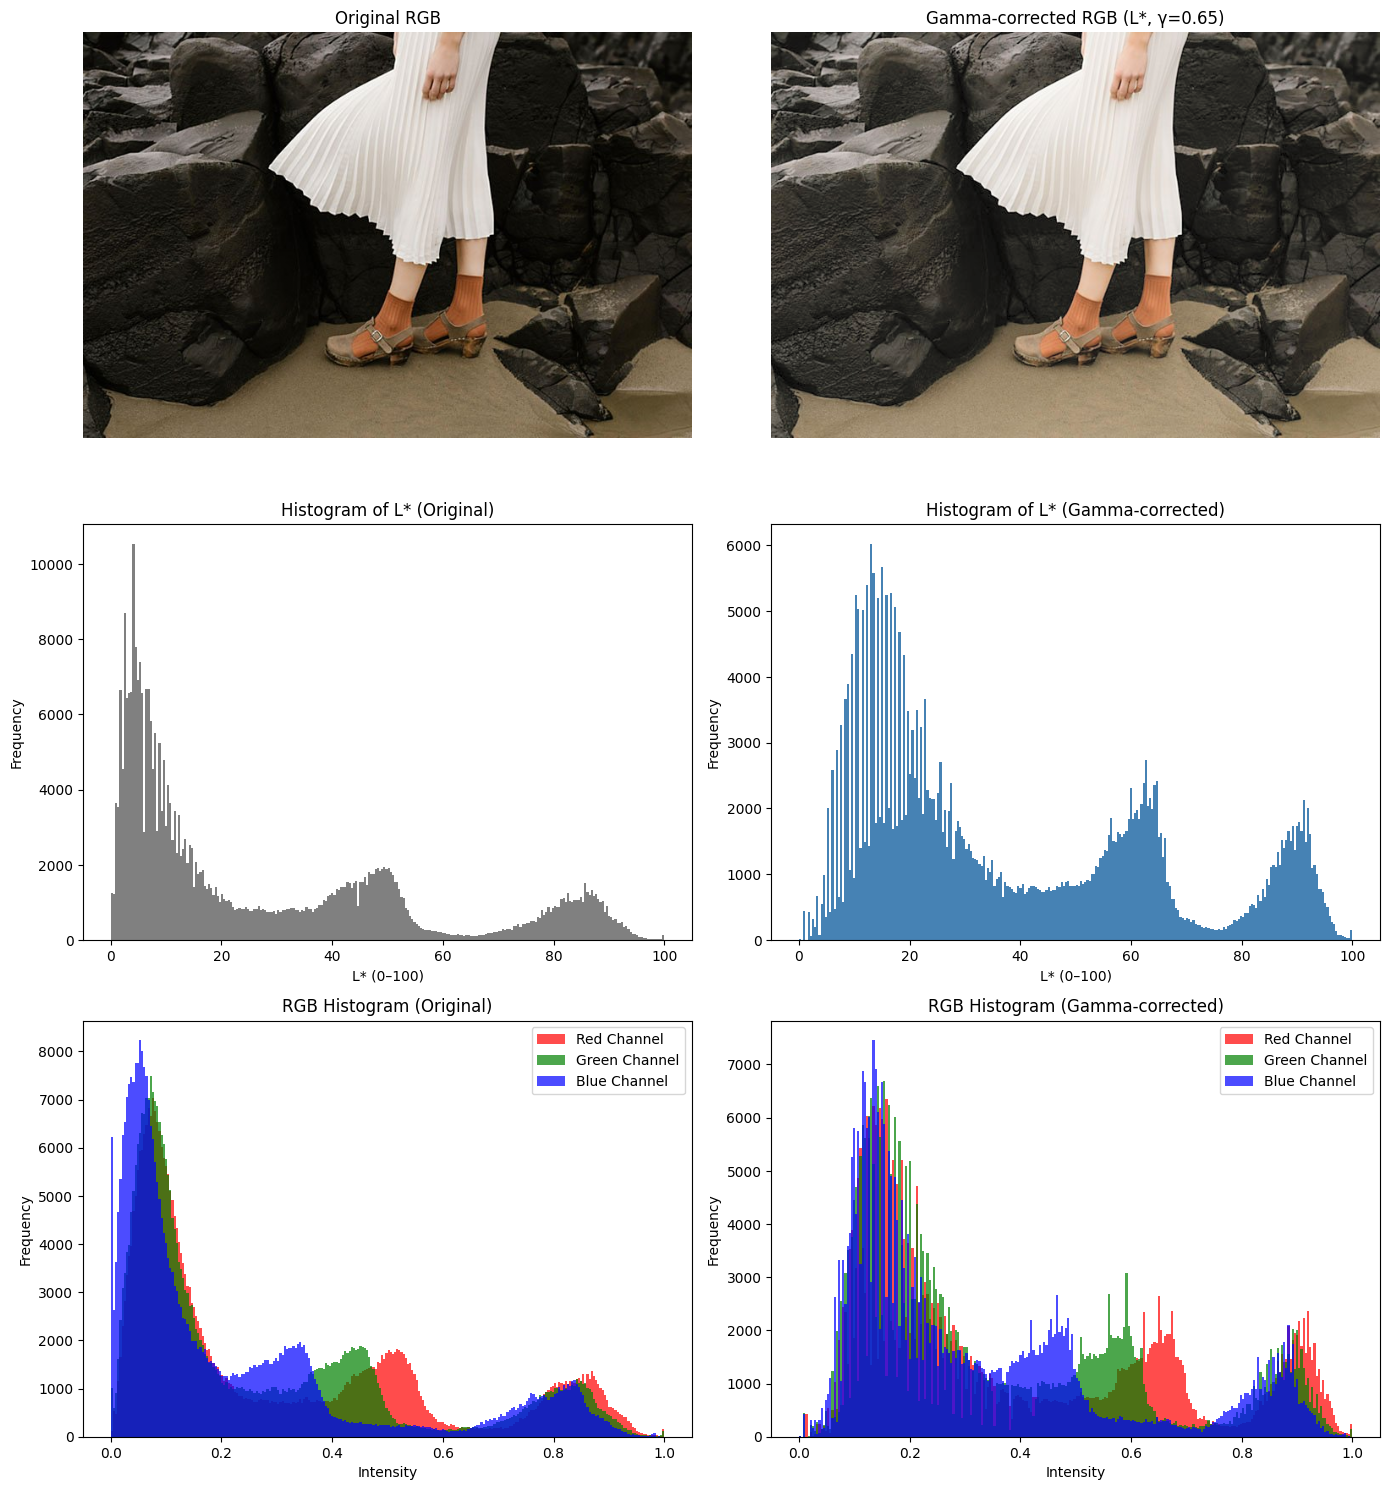

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from skimage.util import img_as_float

image_rgb = io.imread('./a1images/a1images/highlights_and_shadows.jpg')
image_rgb = img_as_float(image_rgb)

# Convert to LAB
image_lab = color.rgb2lab(image_rgb)
L_original = image_lab[..., 0] 
a_channel = image_lab[..., 1]
b_channel = image_lab[..., 2]

# Gamma correction
gamma_value = 0.65
L_norm = np.clip(L_original / 100.0, 0.0, 1.0)
L_corrected = 100.0 * np.power(L_norm, gamma_value)

# Reconstruct
lab_corrected = np.dstack([L_corrected, a_channel, b_channel])
image_corrected_rgb = np.clip(color.lab2rgb(lab_corrected), 0.0, 1.0)

# Plotting
fig, axes = plt.subplots(3, 2, figsize=(14, 15))

axes[0, 0].imshow(image_rgb)
axes[0, 0].set_title('Original RGB')
axes[0, 0].axis('off')

axes[0, 1].imshow(image_corrected_rgb)
axes[0, 1].set_title(f'Gamma-corrected RGB (L*, γ={gamma_value})')
axes[0, 1].axis('off')

axes[1, 0].hist(L_original.ravel(), bins=256, range=(0, 100), color='gray')
axes[1, 0].set_title('Histogram of L* (Original)')
axes[1, 0].set_xlabel('L* (0–100)')
axes[1, 0].set_ylabel('Frequency')

axes[1, 1].hist(L_corrected.ravel(), bins=256, range=(0, 100), color='steelblue')
axes[1, 1].set_title('Histogram of L* (Gamma-corrected)')
axes[1, 1].set_xlabel('L* (0–100)')
axes[1, 1].set_ylabel('Frequency')

colors = ['red', 'green', 'blue']
for i, c in enumerate(colors):
    axes[2, 0].hist(image_rgb[..., i].ravel(), bins=256, color=c, alpha=0.7, label=f'{c.capitalize()} Channel')
axes[2, 0].set_title('RGB Histogram (Original)')
axes[2, 0].set_xlabel('Intensity')
axes[2, 0].set_ylabel('Frequency')
axes[2, 0].legend()

for i, c in enumerate(colors):
    axes[2, 1].hist(image_corrected_rgb[..., i].ravel(), bins=256, color=c, alpha=0.7, label=f'{c.capitalize()} Channel')
axes[2, 1].set_title('RGB Histogram (Gamma-corrected)')
axes[2, 1].set_xlabel('Intensity')
axes[2, 1].set_ylabel('Frequency')
axes[2, 1].legend()

plt.tight_layout()
plt.show()

# Question - 04

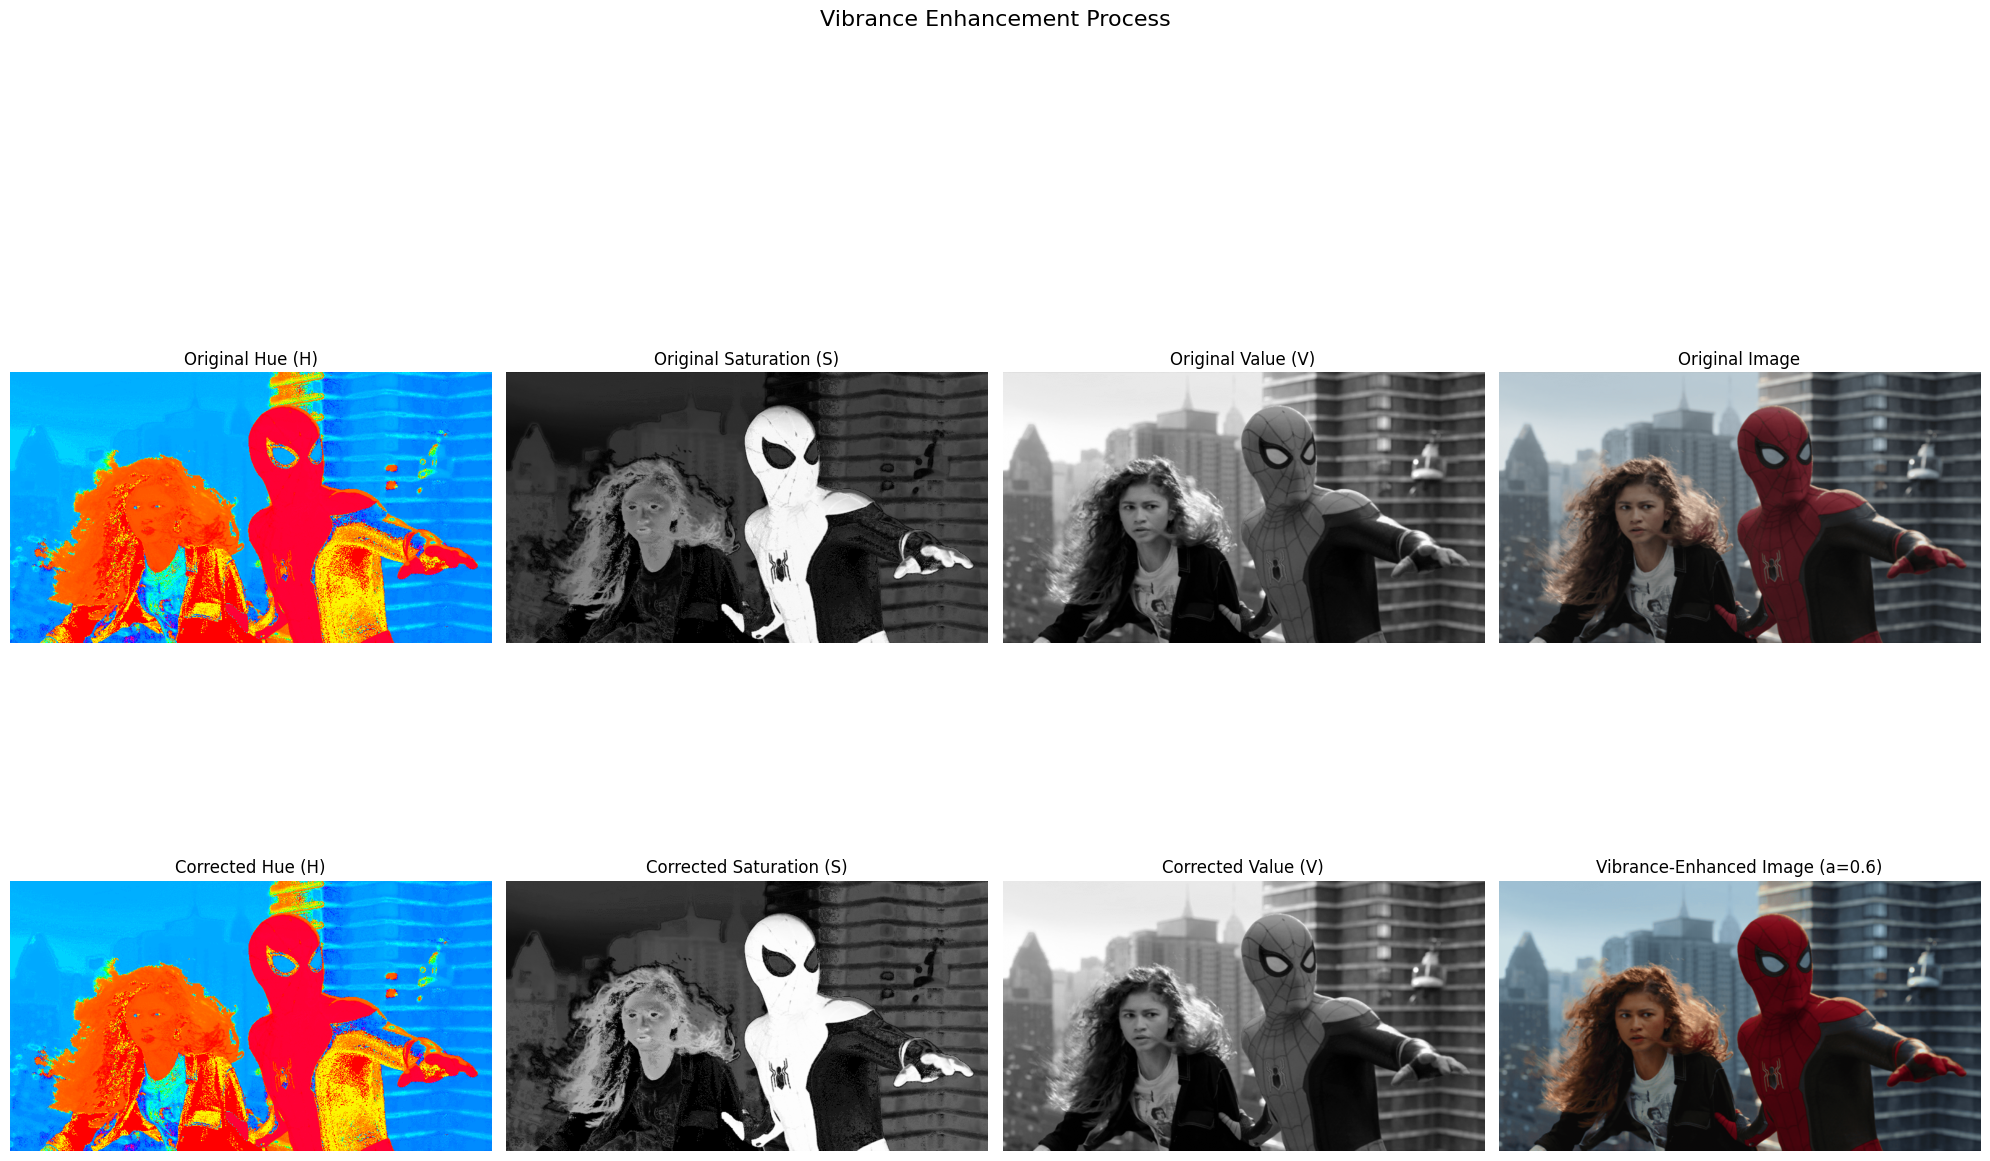

Chosen value of a: 0.6

Testing values of a:


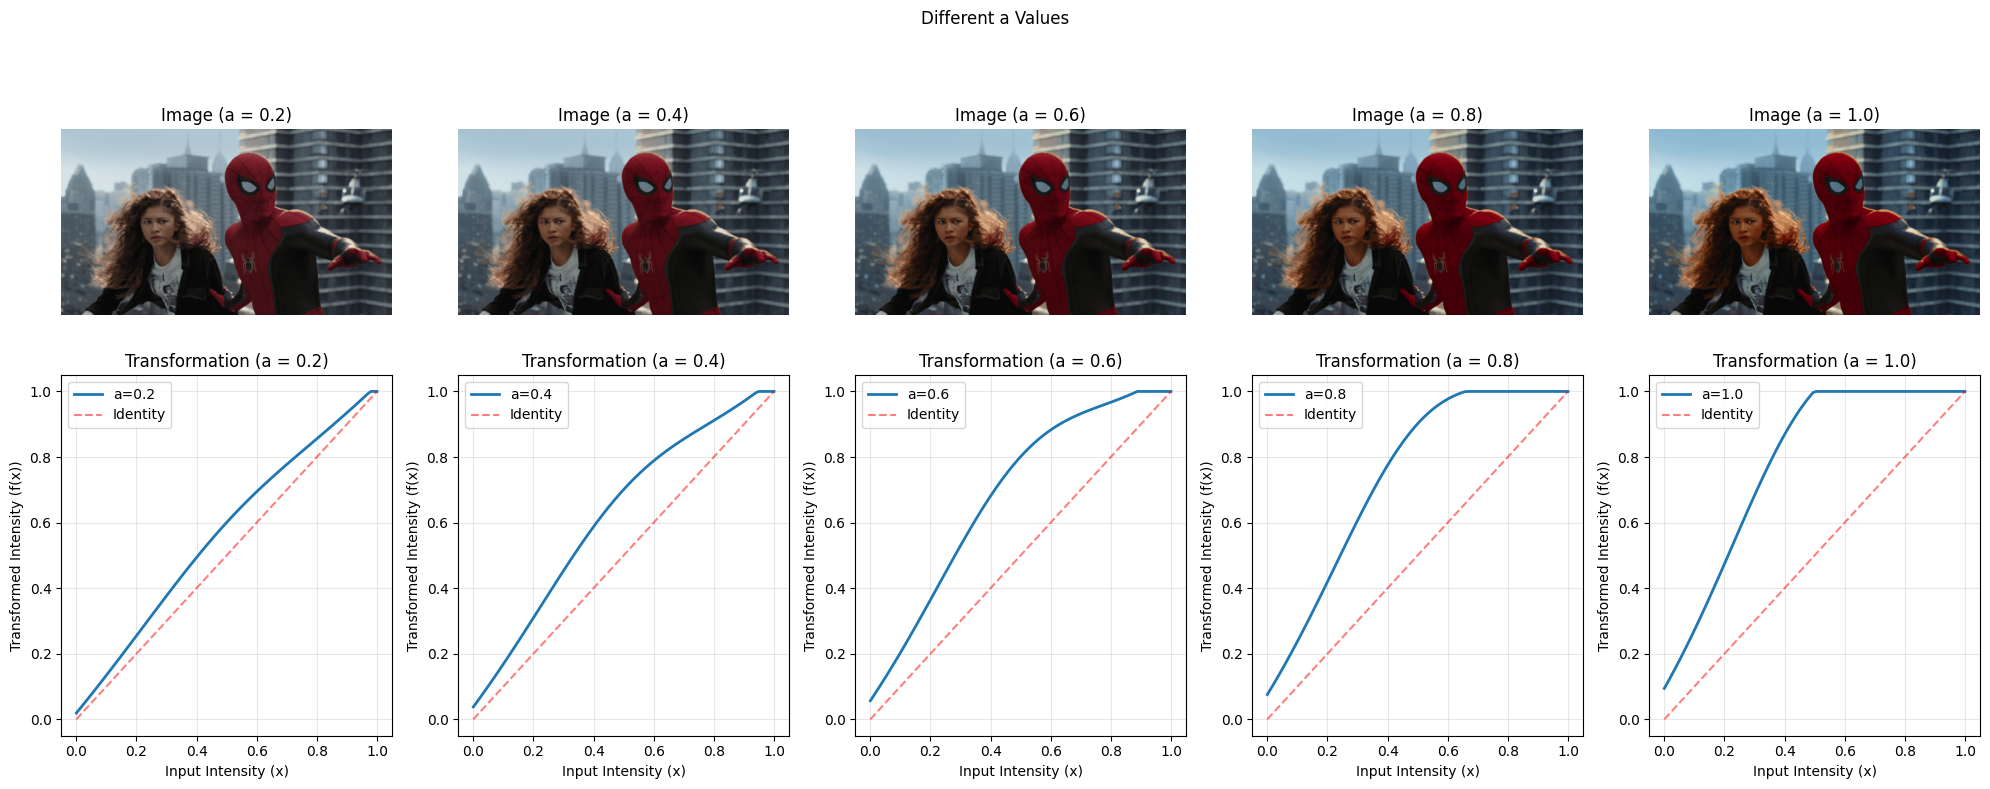

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from skimage.util import img_as_float

image_rgb = io.imread('./a1images/a1images/spider.png')
image_rgb = img_as_float(image_rgb)

image_hsv = color.rgb2hsv(image_rgb)
H_original, S_original, V_original = image_hsv[..., 0], image_hsv[..., 1], image_hsv[..., 2]

def intensity_transformation(x, a, sigma=70):
    x_scaled = x * 255
    transformed = x_scaled + a * 128 * np.exp(-(x_scaled - 128)**2 / (2 * sigma**2))
    transformed = np.clip(transformed, 0, 255)
    return transformed / 255

a = 0.6



S_transformed = intensity_transformation(S_original, a)
image_hsv_transformed = np.dstack((H_original, S_transformed, V_original))
image_rgb_transformed = color.hsv2rgb(image_hsv_transformed)

H_corrected, S_corrected, V_corrected = image_hsv_transformed[..., 0], image_hsv_transformed[..., 1], image_hsv_transformed[..., 2]

fig = plt.figure(figsize=(20, 15))

plt.subplot(2, 4, 1)
plt.imshow(H_original, cmap='hsv', vmin=0, vmax=1)
plt.title('Original Hue (H)')
plt.axis('off')

plt.subplot(2, 4, 2)
plt.imshow(S_original, cmap='gray')
plt.title('Original Saturation (S)')
plt.axis('off')

plt.subplot(2, 4, 3)
plt.imshow(V_original, cmap='gray')
plt.title('Original Value (V)')
plt.axis('off')

plt.subplot(2, 4, 4)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 4, 5)
plt.imshow(H_corrected, cmap='hsv', vmin=0, vmax=1)
plt.title('Corrected Hue (H)')
plt.axis('off')

plt.subplot(2, 4, 6)
plt.imshow(S_corrected, cmap='gray')
plt.title('Corrected Saturation (S)')
plt.axis('off')

plt.subplot(2, 4, 7)
plt.imshow(V_corrected, cmap='gray')
plt.title('Corrected Value (V)')
plt.axis('off')

plt.subplot(2, 4, 8)
plt.imshow(image_rgb_transformed)
plt.title(f'Vibrance-Enhanced Image (a={a})')
plt.axis('off')

plt.suptitle('Vibrance Enhancement Process', fontsize=16, y=0.98)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

print(f"Chosen value of a: {a}")

print("\nTesting values of a:")
test_a_values = [0.2, 0.4, 0.6, 0.8, 1.0]
fig, axes = plt.subplots(2, 5, figsize=(20, 8))

for i, test_a in enumerate(test_a_values):
    S_test = intensity_transformation(S_original, test_a)
    image_hsv_test = np.dstack((H_original, S_test, V_original))
    image_rgb_test = color.hsv2rgb(image_hsv_test)
    
    axes[0, i].imshow(image_rgb_test)
    axes[0, i].set_title(f'Image (a = {test_a})')
    axes[0, i].axis('off')

x_curve = np.linspace(0, 1, 100)
for i, test_a in enumerate(test_a_values):
    y_curve = intensity_transformation(x_curve, test_a)
    axes[1, i].plot(x_curve, y_curve, linewidth=2, label=f'a={test_a}')
    axes[1, i].plot([0, 1], [0, 1], 'r--', alpha=0.5, label='Identity')
    axes[1, i].set_title(f'Transformation (a = {test_a})')
    axes[1, i].set_xlabel('Input Intensity (x)')
    axes[1, i].set_ylabel('Transformed Intensity (f(x))')
    axes[1, i].legend()
    axes[1, i].grid(True, alpha=0.3)

plt.suptitle('Different a Values')
plt.tight_layout()
plt.show()

# Question - 05

Image data type: uint8
Image range: 13 to 83


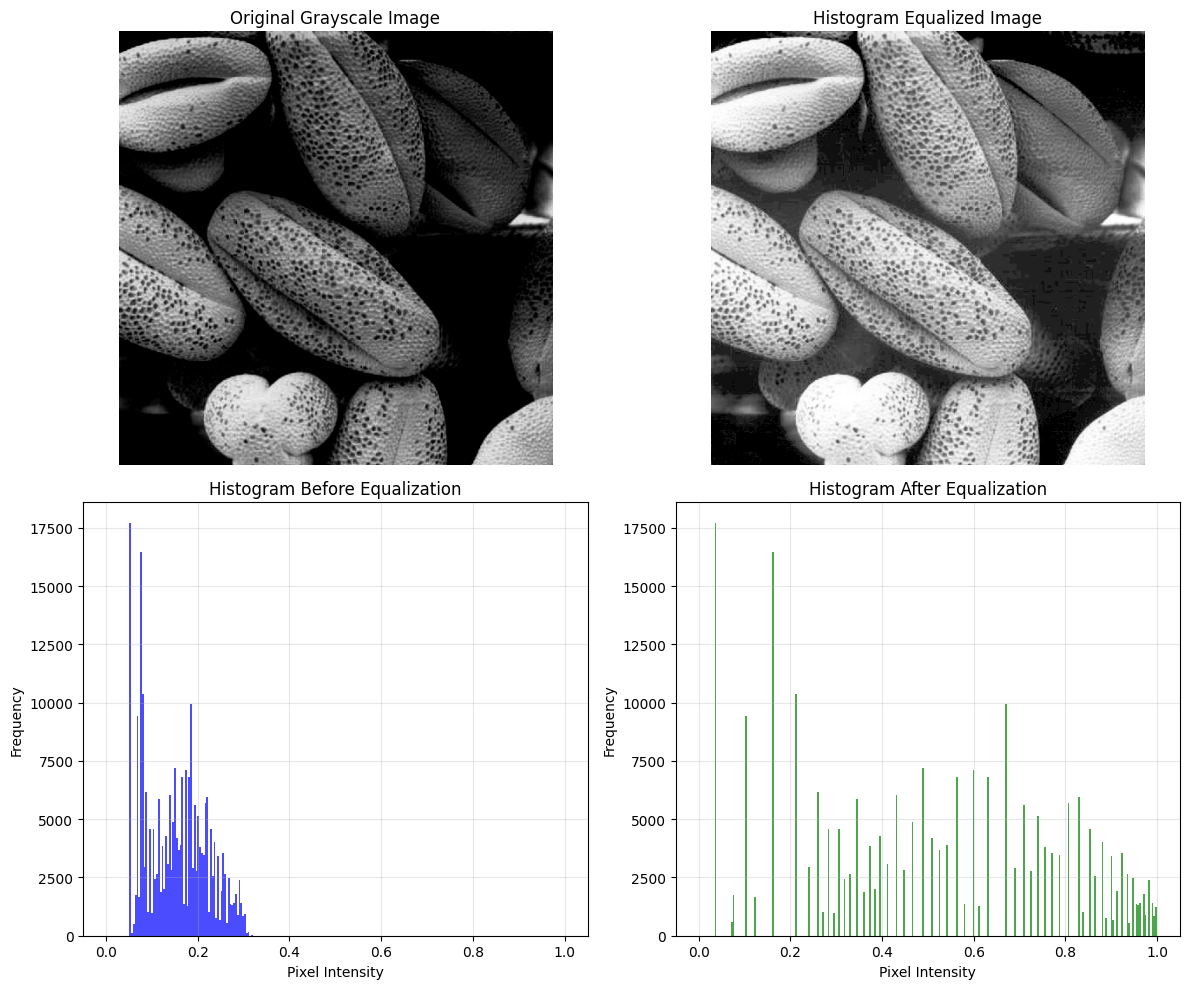

Original image range: 0.051 - 0.325
Equalized image range: 0.039 - 1.000


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, img_as_ubyte, img_as_float
from skimage.color import rgb2gray
from skimage import exposure

# Load the image (assuming Fig. 5 is 'spider.png')
image = io.imread('./a1images/a1images/shells.tif')
print(f"Image data type: {image.dtype}")
print(f"Image range: {image.min()} to {image.max()}")
# Convert to grayscale if it's RGB
if len(image.shape) == 3:
    image = rgb2gray(image)

# Convert to float in range [0, 1]
image = img_as_float(image)
image_display = exposure.rescale_intensity(image, out_range=(0, 255)).astype(np.uint8)

# Flatten the image to 1D for histogram processing
flat_img = image.ravel()

# Step 1: Compute histogram (256 bins for 8-bit intensity levels)
hist, bin_edges = np.histogram(flat_img, bins=256, range=(0, 1))

# Step 2: Compute Cumulative Distribution Function (CDF)
cdf = hist.cumsum()  # Cumulative sum
cdf_normalized = cdf / cdf.max()  # Normalize to [0, 1]

# Step 3: Map original pixel values to equalized values
# Scale CDF to [0, 255], then back to [0, 1]
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Center of each bin
equalized_values = np.interp(flat_img, bin_centers, cdf_normalized)

# Reshape back to original image shape
equalized_image = equalized_values.reshape(image.shape)

# --- Display Results ---
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 1. Original Image
axes[0, 0].imshow(image_display, cmap='gray',vmin=50, vmax=255)
axes[0, 0].set_title('Original Grayscale Image')
axes[0, 0].axis('off')

# 2. Equalized Image
axes[0, 1].imshow(equalized_image, cmap='gray')
axes[0, 1].set_title('Histogram Equalized Image')
axes[0, 1].axis('off')

# 3. Histogram Before
axes[1, 0].hist(flat_img, bins=256, range=(0, 1), color='blue', alpha=0.7)
axes[1, 0].set_title('Histogram Before Equalization')
axes[1, 0].set_xlabel('Pixel Intensity')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].grid(True, alpha=0.3)

# 4. Histogram After
axes[1, 1].hist(equalized_image.ravel(), bins=256, range=(0, 1), color='green', alpha=0.7)
axes[1, 1].set_title('Histogram After Equalization')
axes[1, 1].set_xlabel('Pixel Intensity')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Optional: Print min/max to confirm range
print(f"Original image range: {image.min():.3f} - {image.max():.3f}")
print(f"Equalized image range: {equalized_image.min():.3f} - {equalized_image.max():.3f}")

In [6]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Read TIFF image using OpenCV
image = cv2.imread('./a1images/a1images/shells.tif', cv2.IMREAD_UNCHANGED)

# Check image properties
print(f"Image shape: {image.shape}")
print(f"Image data type: {image.dtype}")
print(f"Image range: {image.min()} to {image.max()}")

# Method 1: Display using OpenCV (most accurate)
cv2.imshow('TIFF Image - OpenCV Display', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Method 2: Display using matplotlib with proper scaling
plt.figure(figsize=(10, 8))

# If 16-bit image, we need to scale it properly
if image.dtype == np.uint16:
    # Convert to 8-bit for display (simple scaling)
    image_8bit = cv2.convertScaleAbs(image, alpha=(255.0/65535.0))
    plt.imshow(image_8bit, cmap='gray')
    plt.title('16-bit TIFF converted to 8-bit for display')
else:
    # 8-bit image - display normally
    plt.imshow(image, cmap='gray', vmin=0, vmax=255)
    plt.title('8-bit TIFF Image')

plt.axis('off')
plt.show()

# Show histogram to understand the intensity distribution
plt.figure(figsize=(10, 4))
if len(image.shape) == 2:  # Grayscale
    plt.hist(image.ravel(), bins=256, range=(0, image.max()), color='gray', alpha=0.7)
    plt.title('Histogram of TIFF Image')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.grid(True, alpha=0.3)
    plt.show()

ModuleNotFoundError: No module named 'cv2'